# find outliers using z score
- after 3rd standard dev

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<Axes: >

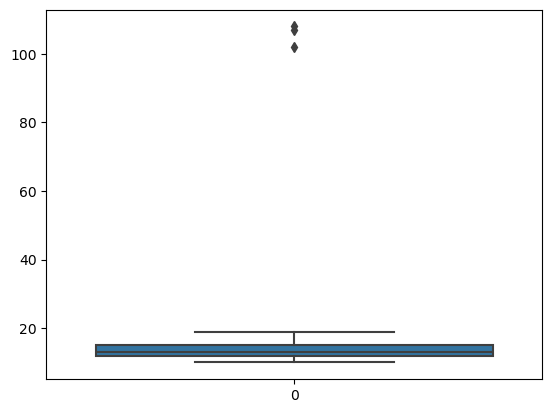

In [7]:
sns.boxplot(dataset)

# numpy
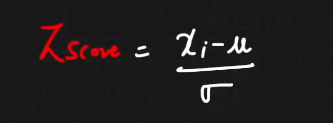
# z-socre 

In [10]:

outlier=[]
def detect_outlier(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        # beyond 3rd standard deviation
        if np.abs(z_score)>threshold: 
            outlier.append(i)

    return outlier

In [11]:
detect_outlier(dataset)

[102, 107, 108]

# IQR (interquartile range)
1. sort the data
2. calculate Q1 and Q3
3. find out IQR (Q3-Q1)
4. find the lower fence (Q1-1.5(IQR))
5. find the upper-fence (Q3+1.5(IQR))

In [20]:
dataset=sorted(dataset)


In [15]:
q1,q3=np.percentile(dataset,[25,75])
q1,q3

(12.0, 15.0)

In [17]:
#find the lower fence and higher fence 
iqr=q3-q1
lower_fence=q1-1.5*iqr
higher_fence=q3+1.5*iqr

In [18]:
print(f'lower fence: {lower_fence} higher fence: {higher_fence}')

lower fence7.5 higher fence19.5


<Axes: >

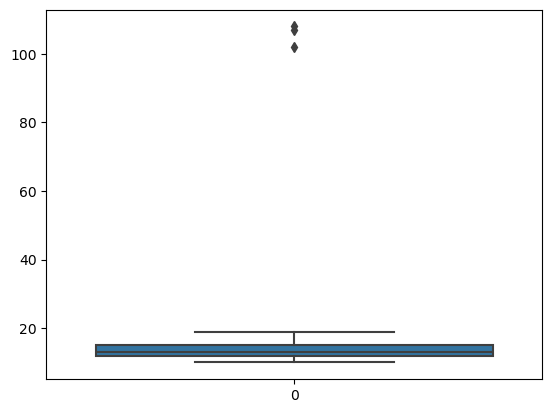

In [19]:
sns.boxplot(dataset)

# Z test
Q1. Suppose the IQ in a certain population is normally distributed with a mean of u=100 and standard deviation of 15. 

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels. 

The following code shows how to perform a one sample z-test in python to determine if the new drug causes a significant difference in IQ levels:

alpha: 0.05

In [42]:
from statsmodels.stats.weightstats import ztest as ztest

In [43]:
data=[88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

In [44]:
ztestv,pvalue=ztest(data,value=100)

In [45]:
ztestv,pvalue

(1.5976240527147705, 0.11012667014384257)

- P Value - can we used along with significance value
- 0.11 > 0.05 we reject the hypothesis


In [46]:
ztestv,pvalue=ztest(data,value=110)

In [47]:
ztestv,pvalue

(-3.640487595530384, 0.00027212221833431376)

- P Value - can we used along with significance value
- 0.00027 < 0.05 we accept the hypothesis

# t - test 

In [48]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [49]:
import numpy as np

In [50]:
ages_mean=np.mean(ages)
ages_mean

30.34375

In [55]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [56]:
age_sample

array([20, 10, 43, 24, 55, 21, 35, 43, 43, 17])

In [57]:
from scipy.stats import ttest_1samp

In [58]:
ttest_1samp(age_sample,30)

TtestResult(statistic=0.23748383232283285, pvalue=0.8175993822012235, df=9)

In [59]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)

school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [60]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [61]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], dtype=int64)

In [62]:
classA_ages.mean()

46.9

In [63]:
ttest_1samp(classA_ages,popmean=school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [64]:
school_ages.mean()

53.303333333333335

In [65]:
import seaborn as sns

In [66]:
df=sns.load_dataset('iris')

In [68]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [71]:
df.drop(columns=['species']).corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

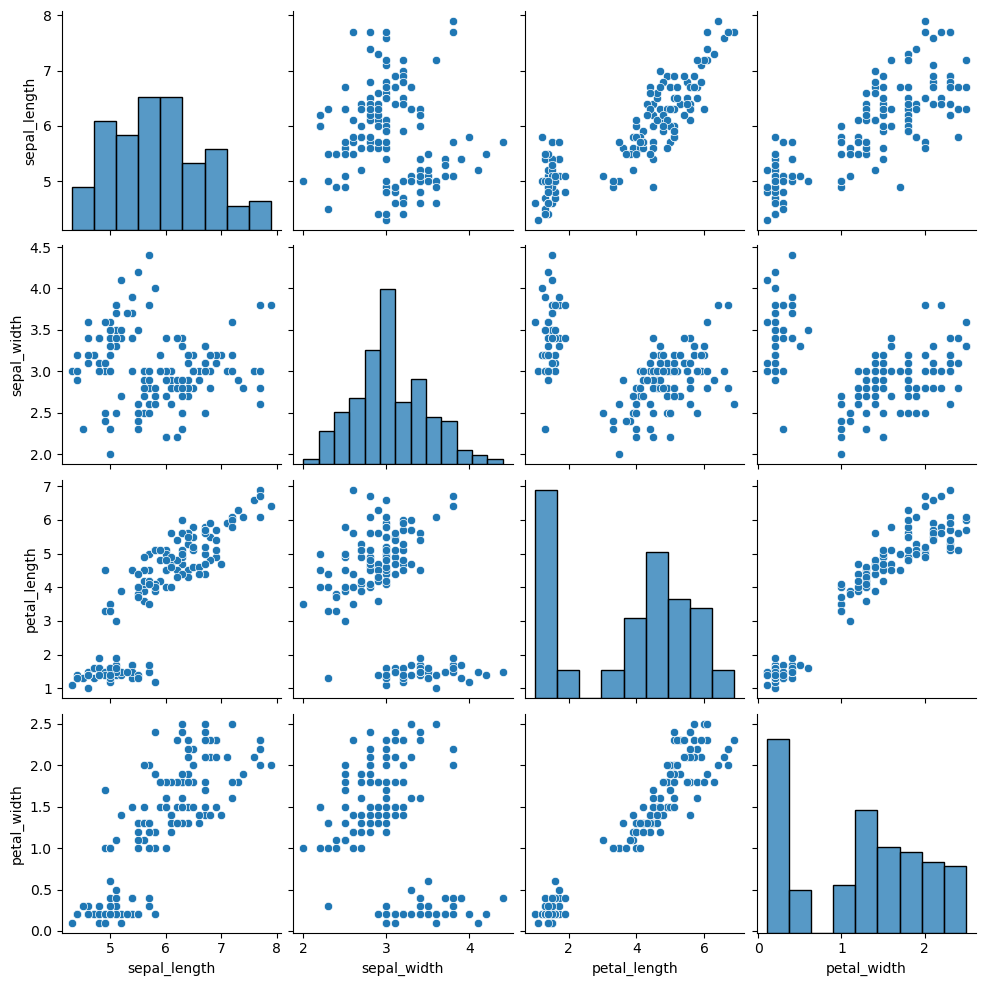

In [72]:
sns.pairplot(df)